In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [5]:
df = df.rename(columns = {'ordered_at': 'datetime'})

In [6]:
df['price'] = df['price'].apply(lambda x: x.replace('$', ''))
df['price'] = df['price'].astype(float)
df['line_total'] = df['line_total'].apply(lambda x: x.replace('$', ''))
df['line_total'] = df['line_total'].astype(float)

In [7]:
df.dtypes

order_id        int64
name           object
datetime       object
price         float64
quantity        int64
line_total    float64
dtype: object

In [8]:
df

,order_id,name,datetime,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
...,...,...,...,...,...,...
29917,18452,"""ICE CREAM"" Dulce De Leche",2018-06-26 03:56:13,-1.5,2,-3.0
29918,12889,"""ICE CREAM"" Dark Chocolate",2018-03-03 10:06:21,4.0,3,12.0
29919,14526,"""ICE CREAM"" Peanut Fudge",2018-04-05 17:33:24,3.5,3,10.5
29920,19589,"""CONE"" Dipped Waffle Cone",2018-07-20 09:10:01,3.5,2,7.0


#### TODO: drop if duplicated or null

In [9]:
df[df.duplicated()].shape[0]

538

In [10]:
df = df.drop_duplicates()
df = df.dropna()

In [11]:
df.isnull().sum()

order_id      0
name          0
datetime      0
price         0
quantity      0
line_total    0
dtype: int64

In [12]:
df[df['name'].isnull()].head()

,order_id,name,datetime,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [13]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [14]:
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [15]:
df[(df['line_total'] != df['price']*df['quantity'] ) & (df['line_total'] < 0)]

,order_id,name,datetime,price,quantity,line_total


In [16]:
df.describe()

,order_id,price,quantity,line_total
count,27903.000000,27903.000000,27903.000000,27903.000000
mean,14992.452675,2.461044,2.001039,4.925169
std,2889.735987,1.173305,0.819074,3.254245
min,10000.000000,-4.000000,1.000000,-12.000000
25%,12496.000000,1.500000,1.000000,2.500000
50%,14972.000000,2.500000,2.000000,4.000000
75%,17508.500000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [17]:
df['category'] = df['name'].str.extract(r'["][\w\s]+["]', expand = True)

ValueError: pattern contains no capture groups

In [18]:
df.head()

,order_id,name,datetime,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0


#### Analysis, finally!

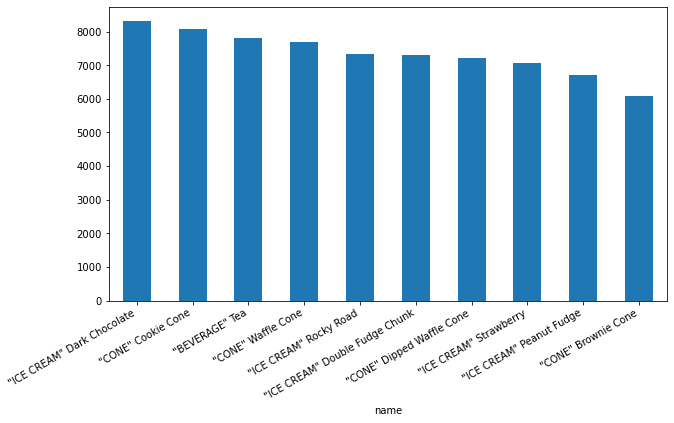

In [19]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()